In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi

In [3]:
%matplotlib inline

In [43]:
grayscale = ndi.imread('data/QLD-60.png',flatten=True)

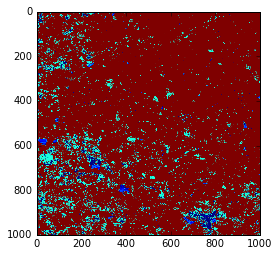

In [6]:
plt.imshow(grayscale)
plt.show()

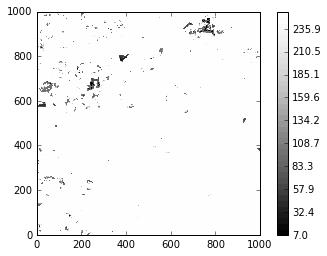

In [9]:
xs = np.arange(grayscale.shape[1])
ys = np.arange(grayscale.shape[0])
xxs, yys = np.meshgrid(xs,ys)
contourPlot(xxs,yys,grayscale)

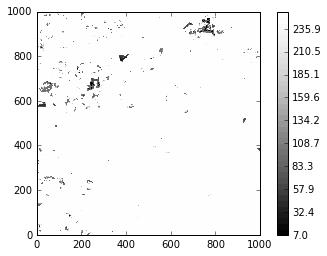

In [52]:
closed = ndi.grey_closing(grayscale,size=(3,3))
contourPlot(xxs,yys,grayscale)

In [21]:
grayscale[grayscale < 125] = 0

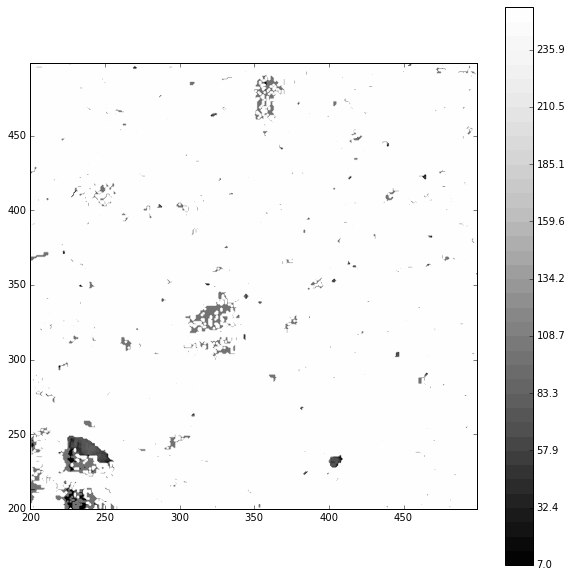

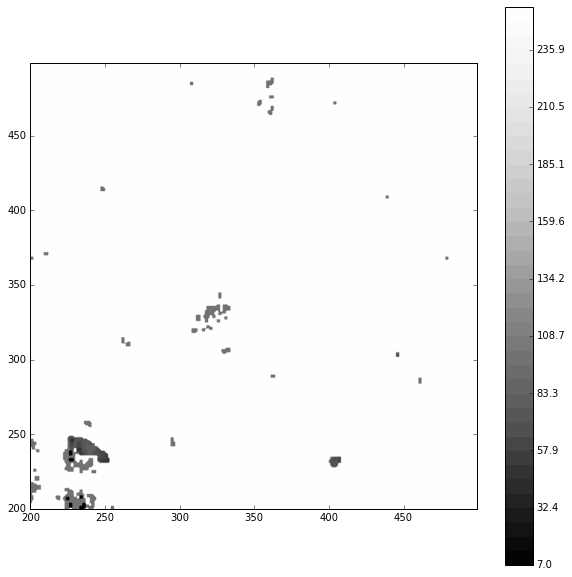

In [66]:
contourPlot(xxs,yys,grayscale,sel=(200,500,200,500))
contourPlot(xxs,yys,closed,sel=(200,500,200,500))

In [478]:
def contourPlot(xs,ys,fs,sel="Full",size=(10,10),invertCol=True,
                key=True,show=True,lines=False,raster=True,colSchem='Greys'):
    """
    Helper function to support plotting a graph
    """
    if not sel == "Full":
        x1, x2, y1, y2 = sel
        xs = xs[x1:x2,y1:y2]
        ys = ys[x1:x2,y1:y2]
        fs = fs[x1:x2,y1:y2]
    if invertCol:
        colSchem = colSchem+'_r'
    cmap = plt.cm.get_cmap(colSchem)
    levels = np.linspace(np.min(fs),np.max(fs),40)
    #plt.figure(figsize=size)
    if raster:
        plt.contourf(xs,ys,fs,levels=levels,cmap=cmap)
    if lines:
        plt.contour(xs,ys,fs)
    if key:
        plt.colorbar()
    plt.axes().set_aspect('equal')
    if show:
        plt.show()
    return

In [77]:
xs = np.arange(200)
ys = np.arange(200)
xxs, yys = np.meshgrid(xs,ys)
testImage = np.zeros_like(xxs)

In [78]:
testImage[90:110,90:110] += 1

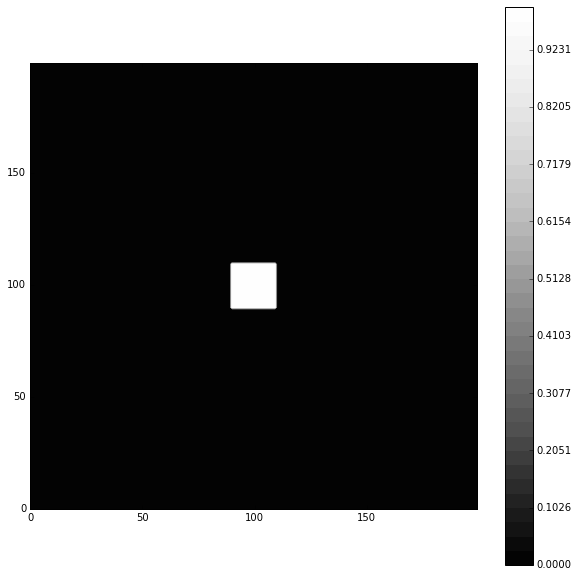

In [79]:
contourPlot(xxs,yys,testImage)

In [92]:
gaussed = ndi.gaussian_filter(testImage,sigma=3)

## Importing elevation data

In [94]:
from osgeo import gdal

In [95]:
gdal.UseExceptions()

In [255]:
def loadGeotiff(filename):
    ds = gdal.Open(filename)
    band = ds.GetRasterBand(1)
    elevation = band.ReadAsArray()
 
    nrows, ncols = elevation.shape
    x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

    x1 = x0 + dx * ncols
    y1 = y0 + dy * nrows
    
    xs = np.linspace(x0,x1,nrows)
    ys = np.linspace(y0,y1,ncols)
    xxs, yys = np.meshgrid(xs,ys)
    return elevation, dx, dy, xxs, yys

In [240]:
tile1 = loadGeotiff('data/elevation/0000_0000.tif')
tile2 = loadGeotiff('data/elevation/0000_0001.tif')
tile3 = loadGeotiff('data/elevation/0001_0000.tif')
tile4 = loadGeotiff('data/elevation/0001_0001.tif')

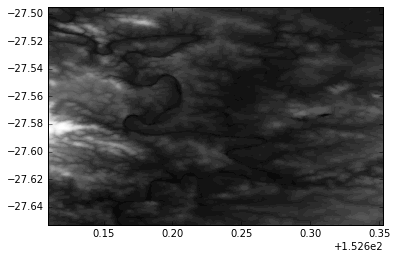

In [484]:
contourPlot(tile1[3].T,tile1[4].T,tile1[0],show=False,key=False)

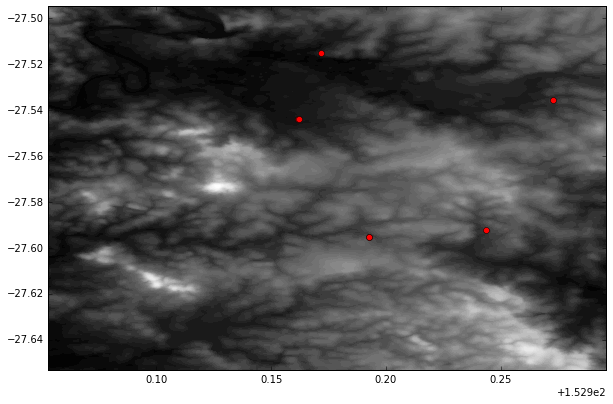

In [343]:
contourPlot(tile3[3].T,tile3[4].T,tile3[0],show=False,key=False)
for i in relevSens(sensorIndex,tile3):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.show()

In [390]:
selectH.shape

(570, 875)

In [402]:
selectH = np.copy(tile4[0])
selectH[230:330,230:500]= -20

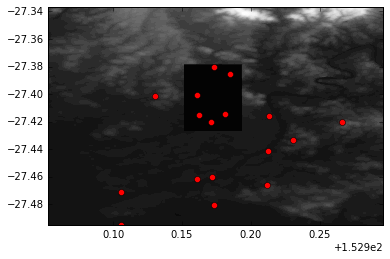

In [410]:
contourPlot(tile4[3].T,tile4[4].T,selectH,show=False,key=False)
for i in relevSens(sensorIndex,tile4):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.show()

In [430]:
np.min(tile4[0][230:500,230:330]),np.max(tile4[0][230:500,230:330])

(-1.9111856, 62.366161)

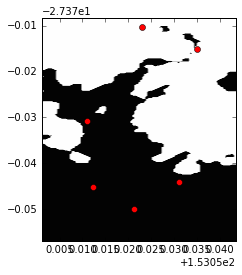

In [442]:
currentPlot = np.copy(tile4[0])
currentPlot[currentPlot < 15] = -10
currentPlot[currentPlot >= 15] = 1
contourPlot(tile4[3].T,tile4[4].T,currentPlot,sel=(230,330,230,500),show=False,key=False)
for i in relevSens(sensorIndex,tile4,sel=(230,500,230,330)):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.savefig('data/elevation-sensors-overlay.png',dpi=300)

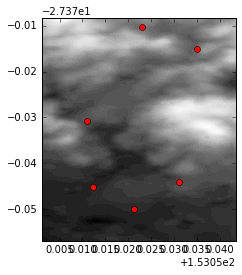

In [443]:
contourPlot(tile4[3].T,tile4[4].T,tile4[0],sel=(230,330,230,500),show=False,key=False)
for i in relevSens(sensorIndex,tile4,sel=(230,500,230,330)):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.savefig('data/elevation-sensors.png',dpi=300)

In [426]:
relevSens(sensorIndex,tile4,sel=(230,500,230,330))

[43, 44, 45, 46, 48, 49]

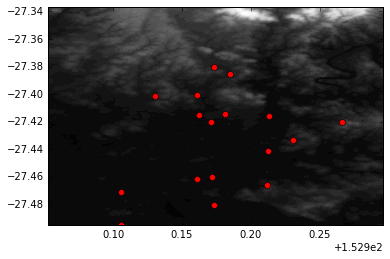

In [381]:
contourPlot(tile4[3].T,tile4[4].T,tile4[0],show=False,key=False)
for i in relevSens(sensorIndex,tile4):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.show()

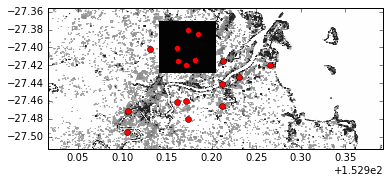

In [421]:
# contourPlot(tile4[3].T,tile4[4].T,tile4[0],show=False,key=False)
for i in relevSens(sensorIndex,tile4):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
contourPlot(360+floodHistory[3],floodHistory[4],select,sel=(0,500,401,1000),invertCol=False,key=False,show=False)
plt.savefig('out/flood-history-sel.png',dpi=300)

In [376]:
select = np.copy(floodHistory[0])
select[50:230,600:700]= -1

In [270]:
sensorIndex[9,4:6]/10000

array([  27.5924,  153.1437])

In [271]:
circ = np.sqrt(np.square(tile3[4]--27.5924) + np.square(tile3[3]-153.1437))

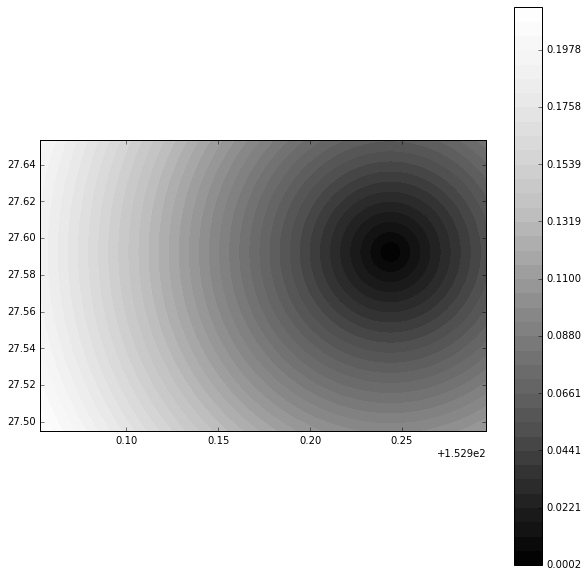

In [272]:
contourPlot(tile3[3],-tile3[4],circ)

In [246]:
tile1[4]

array([[-27.49486111, -27.49486111, -27.49486111, ..., -27.49486111,
        -27.49486111, -27.49486111],
       [-27.49504227, -27.49504227, -27.49504227, ..., -27.49504227,
        -27.49504227, -27.49504227],
       [-27.49522343, -27.49522343, -27.49522343, ..., -27.49522343,
        -27.49522343, -27.49522343],
       ..., 
       [-27.65283213, -27.65283213, -27.65283213, ..., -27.65283213,
        -27.65283213, -27.65283213],
       [-27.65301329, -27.65301329, -27.65301329, ..., -27.65301329,
        -27.65301329, -27.65301329],
       [-27.65319444, -27.65319444, -27.65319444, ..., -27.65319444,
        -27.65319444, -27.65319444]])

In [408]:
def relevSens(indexArray,roi,sel="Full"):
    """
    Given the indices of sensors, return the 
    """
    out = []
    elevation, dx, dy, xxs, yys = roi
    if not sel == "Full":
        x1, x2, y1, y2 = sel
        xxs = xxs[x1:x2,y1:y2]
        yys = yys[x1:x2,y1:y2]
        elevation = elevation[x1:x2,y1:y2]
    x1 = np.max(xxs)
    x0 = np.min(xxs)
    y1 = np.max(yys)
    y0 = np.min(yys)
    for i in range(len(indexArray)):
        current = indexArray[i]
        if (x0 < current[5]/10000 <= x1) and (y0 < -current[4]/10000 < y1):
            out.append(i)
    return out

In [267]:
relevSens(sensorIndex,tile3),relevSens(sensorIndex,tile4)

([9, 10, 15, 16, 17, 18, 19],
 [20, 21, 22, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [269]:
tile1[0].shape

(570, 875)

In [216]:
plt.imshow(tile4[0],cmap='gist_earth')
plt.show()

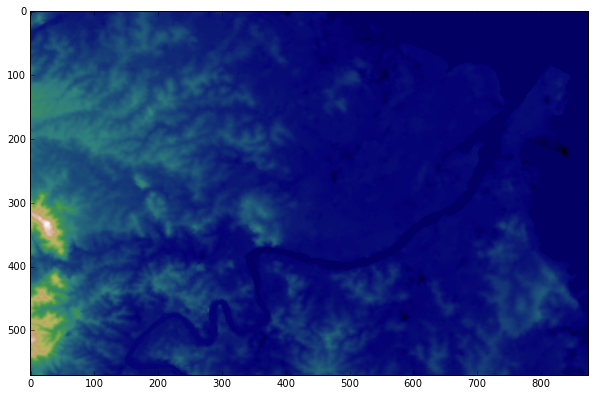

In [447]:
plt.figure(figsize=(10,10))
plt.imshow(tile4[0],cmap='gist_earth')
plt.show()

In [111]:
plt.imshow(elevation, cmap='gist_earth')
plt.show()

In [112]:
nrows, ncols = elevation.shape
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()

x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

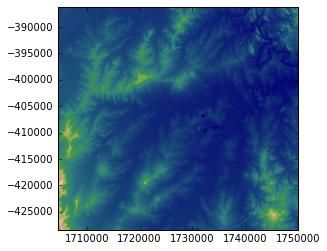

In [113]:
plt.imshow(elevation, cmap='gist_earth', extent=[x0, x1, y1, y0])
plt.show()

## Importing river history data

In [283]:
floodHistory = loadGeotiff('data/flood-history/test.tif')

In [123]:
floodHist = gdal.Open('data/flood-history/test.tif')
floodBand = floodHist.GetRasterBand(1)
floodElev = floodBand.ReadAsArray()

In [356]:
np.max(tile4[3]),np.min(tile4[3]),np.max(tile4[4]),np.min(tile4[4]),tile4[0].size

(153.19597222300001,
 152.95291666700001,
 -27.336527777899999,
 -27.494861111199999,
 498750)

In [353]:
np.max(tile3[3]),np.min(tile3[3]),np.max(tile3[4]),np.min(tile3[4]),tile3[0].size

(153.19597222300001,
 152.95291666700001,
 -27.494861111199999,
 -27.653194444499999,
 498750)

In [351]:
360+np.max(floodHistory[3]),360+np.min(floodHistory[3]),np.max(floodHistory[4]),np.min(floodHistory[4]),floodHistory[0].size

(153.29225509599124,
 152.6653527714632,
 -27.355287479404595,
 -27.672195823605335,
 1000000)

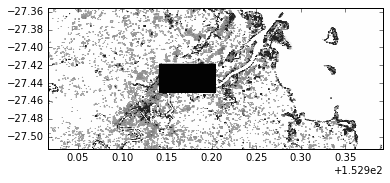

In [372]:
contourPlot(360+floodHistory[3],floodHistory[4],select,sel=(0,500,401,1000),invertCol=False,key=False)

In [ ]:
plt.figure(figsize=(10,10))
contourPlot(floodHistory[3],floodHistory[4],floodHistory[0],sel=(200,800,200,800),invertCol=False,key=False)

In [481]:
tile4[0].shape

(570, 875)

In [496]:
plt.figure(figsize=(10,10))
contourPlot(360+floodHistory[3],floodHistory[4],floodHistory[0],sel=(0,500,450,900),
            invertCol=False,key=False,lines=False,show=False)
for i in relevSens(sensorIndex,tile4):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.savefig('data/demo-1.png',dpi=300)

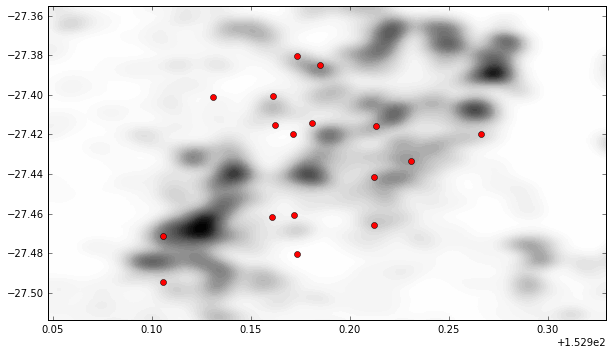

In [499]:
plt.figure(figsize=(10,10))
contourPlot(360+floodHistory[3],floodHistory[4],ndi.gaussian_filter(floodHistory[0],sigma=(10,10)),sel=(0,500,450,900),
            invertCol=False,key=False,lines=False,show=False)
for i in relevSens(sensorIndex,tile4):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.savefig('data/demo-2.png',dpi=300)

In [502]:
plt.figure(figsize=(10,10))
contourPlot(tile4[3].T,tile4[4].T,tile4[0],sel=(0,570,100,875),show=False,key=False,invertCol=False,colSchem='gist_earth')
for i in relevSens(sensorIndex,tile4):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
contourPlot(360+floodHistory[3],floodHistory[4],ndi.gaussian_filter(floodHistory[0],sigma=(10,10)),sel=(0,500,450,900),
            invertCol=False,key=False,lines=True,raster=False)
plt.savefig('out/demo-3.png',dpi=300)

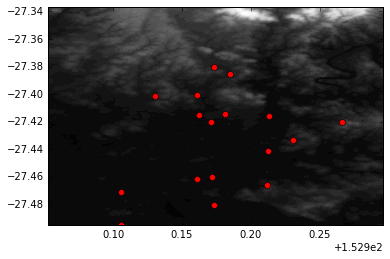

In [460]:
contourPlot(tile4[3].T,tile4[4].T,tile4[0],show=False,key=False)
for i in relevSens(sensorIndex,tile4):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')

In [292]:
ndi.gaussian_filter(floodHistory[0],sigma=(10,10))

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 3, ..., 0, 0, 0],
       ..., 
       [7, 7, 7, ..., 5, 5, 5],
       [7, 7, 7, ..., 5, 5, 5],
       [7, 7, 7, ..., 5, 5, 5]], dtype=uint8)

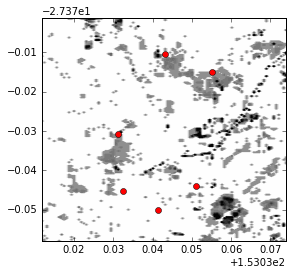

In [424]:
contourPlot(360+floodHistory[3],floodHistory[4],floodHistory[0],sel=(50,230,600,700),invertCol=False,key=False,show=False)
for i in relevSens(sensorIndex,tile4,sel=(230,500,230,330)):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.savefig('out/flood-risk.png',dpi=300)

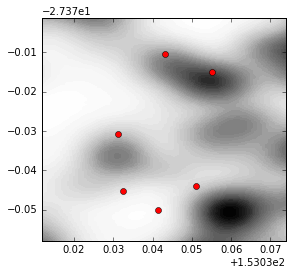

In [425]:
contourPlot(360+floodHistory[3],floodHistory[4],Out[292],sel=(50,230,600,700),invertCol=False,key=False,show=False)
for i in relevSens(sensorIndex,tile4,sel=(230,500,230,330)):
    current = sensorIndex[i,4:6]/10000
    plt.plot(current[1],-current[0],'ro')
plt.savefig('out/flood-risk-smeared.png',dpi=300)

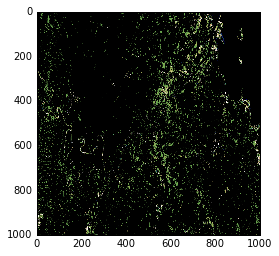

In [124]:
plt.imshow(floodElev, cmap='gist_earth')
plt.show()

### Generate a risk profile by applying Gaussian filter to the image

In [279]:
ndi.gaussian_filter(floodElev,sigma=(2,2))

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ..., 
       [20, 18, 15, ..., 11, 14, 16],
       [26, 24, 18, ..., 11, 15, 17],
       [30, 26, 20, ..., 11, 15, 17]], dtype=uint8)

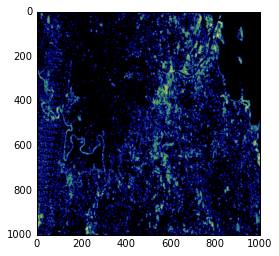

In [281]:
plt.imshow(Out[279], cmap='gist_earth')
plt.show()

## Importing river sensors

In [134]:
sensorIndex = np.loadtxt('data/data/san-ind-num.csv',delimiter=',',skiprows=1)

Some very ugly hacks to get the river sensor data working, currently it fetches only the latest readings

In [205]:
def sensorValue(current,high,med,low):
    """
    Return a single value from the sensors given the
    three static values, high, medium and low, and the
    current water height
    """
    if (high - med == 0) or (med - low == 0):
        return 0
    if current > med:
        return (current - med)/(high-med)
    else:
        return (current - low)/(med - low)

In [206]:
def currentLevels(indexArray,relDir='data/data/stations/'):
    """
    Returns a 1D array of the latest river heights at each
    sensor, the index is the same as the sensor in the indexArray
    """
    n = indexArray.shape[0]
    heights = np.zeros((n,))
    for i in range(n):
        num = str(int(indexArray[i][0]))
        if len(num) < 6:
            num = '0'+num
        cur = np.loadtxt(relDir+num+'.cvs',
                         dtype=[('timestamp','S16'),('height','float')],
                         delimiter=','
                         ,skiprows=1)
        absHeight = cur[-1][1]
        heights[i] += sensorValue(absHeight,indexArray[i][3],indexArray[i][2],indexArray[i][1])
    return heights

In [207]:
currentLevels(sensorIndex)

array([ -1.43076923,  -2.88      ,  -2.9       ,  -5.1       ,
        -1.48      ,  -3.07      ,  -1.18      ,  -4.24      ,
        -4.24      ,  -1.68      ,  -3.81      ,  -3.4       ,
        -6.42      ,  -2.095     ,  -2.125     ,  -1.80666667,
        -1.8       ,  -2.96333333,  -2.97666667,  -9.        ,
        -2.425     ,  -1.86      ,  -2.18      ,  -5.15      ,
        -1.16      ,  -0.74666667,  -0.77333333,  -1.68666667,
        -2.11333333,  -1.10571429,  -1.10571429,  -2.16956522,
        -1.55333333,  -3.5       ,  -5.49      ,  -2.2475    ,
        -2.2675    ,  -7.        ,  -4.75      ,  -2.78285714,
        -1.91333333,  -1.75675676,  -6.16666667,  -3.33333333,
        -3.825     ,  -2.58      ,  -2.55      ,  -3.38      ,
        -2.75      ,  -1.775     ,  -0.84      ,  -0.65      ,
        -1.55333333,  -2.87272727,  -2.87272727,  -2.9       ,
        -4.98      ,  -3.07333333,  -3.06666667,  -0.52285714,
        -0.51714286,  -0.315     ,  -2.86666667,  -2.85

Now we need to overlay this data onto the height map and generate a warning. The sensors are located in the following locations.

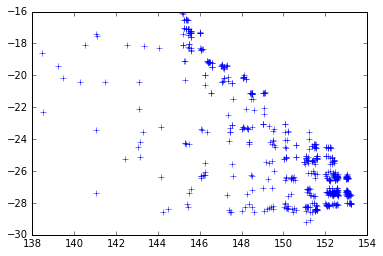

In [189]:
xvalues = sensorIndex[:,5]/10000
yvalues = -sensorIndex[:,4]/10000
plt.plot(xvalues,yvalues,'+')
plt.show()